<a href="https://colab.research.google.com/github/gabriel-schineider/DaSc_Imobiliaria/blob/main/DaSc_Imobiliaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conhecendo a base de dados

## Importando os dados


In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'

In [ ]:
# pd.read_csv(url) # After visualize it, I noticed that the data frame as not separeted right, because the data was separeted with ";", not with the standart ",".

# pd.read_csv(url, sep=';') # Then I changed the code, separating it right.

df = pd.read_csv(url, sep=';')

In [ ]:
df

# I also could use "data.head(numberOfLines)" for visualizing a certain number of lines from top or "data.tail(numberOfLines)" for visualizing a certain number of lines from down.

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


## Características gerais da base de dados

In [ ]:
print(f'Data Type: {type(df)}')
print(f'Data Size: {df.size}')
print(f'Data Shape: {df.shape}')

Data Type: <class 'pandas.core.frame.DataFrame'>
Data Size: 296640
Data Shape: (32960, 9)


In [ ]:
df.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [ ]:
df['Tipo']

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Apartamento
...,...
32955,Quitinete
32956,Apartamento
32957,Apartamento
32958,Apartamento


In [ ]:
df[['Area', 'Valor']]

,Area,Valor
0,40,1700.0
1,100,7000.0
2,150,5200.0
3,15,800.0
4,48,800.0
...,...,...
32955,27,800.0
32956,78,1800.0
32957,48,1400.0
32958,70,3000.0


In [ ]:
df['Area']

,Area
0,40
1,100
2,150
3,15
4,48
...,...
32955,27
32956,78
32957,48
32958,70


In [ ]:
df['Valor']

,Valor
0,1700.0
1,7000.0
2,5200.0
3,800.0
4,800.0
...,...
32955,800.0
32956,1800.0
32957,1400.0
32958,3000.0


# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [ ]:
# df.groupby('Tipo').mean(numeric_only=True) # That's the right way to get the mean of numeric columns

ValuePerType = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor',ascending=True)
ValuePerType

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


<Axes: ylabel='Tipo'>

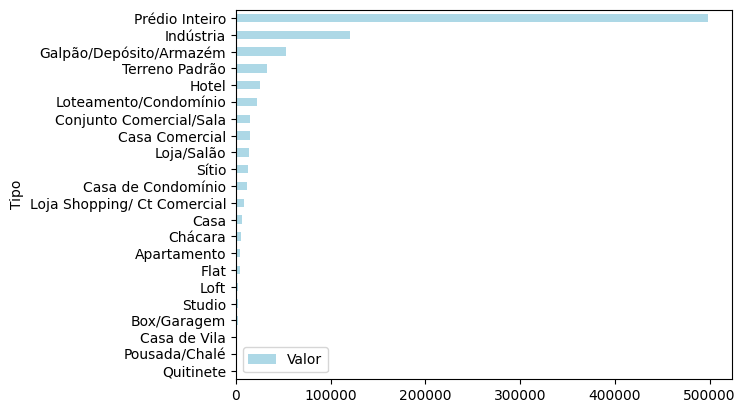

In [ ]:
ValuePerType.plot(kind='barh',
                  color='lightblue')

## Removendo os imóveis comerciais

In [ ]:
# Identifying the groups we have in "Tipo"

df.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [ ]:
commercial_properties = np.array(['Conjunto Comercial/Sala',
                                  'Prédio Inteiro', 'Loja/Salão',
                                  'Galpão/Depósito/Armazém', 'Casa Comercial',
                                  'Terreno Padrão', 'Loja Shopping/ Ct Comercial',
                                  'Loteamento/Condomínio', 'Studio', 'Hotel', 'Indústria'])

In [ ]:
# Separating the commercial only
dfCommercial = df.query('@commercial_properties in Tipo')

In [ ]:
# Separating the residential only
dfResidential = df.query('@commercial_properties not in Tipo')

                           Valor
Tipo                            
Quitinete            1246.840909
Pousada/Chalé        1480.000000
Casa de Vila         1574.369478
Box/Garagem          1899.756098
Loft                 2557.882353
Flat                 4546.189076
Apartamento          4744.614648
Chácara              4900.000000
Casa                 6793.454922
Casa de Condomínio  11952.061245
Sítio               12499.000000



<Axes: ylabel='Tipo'>

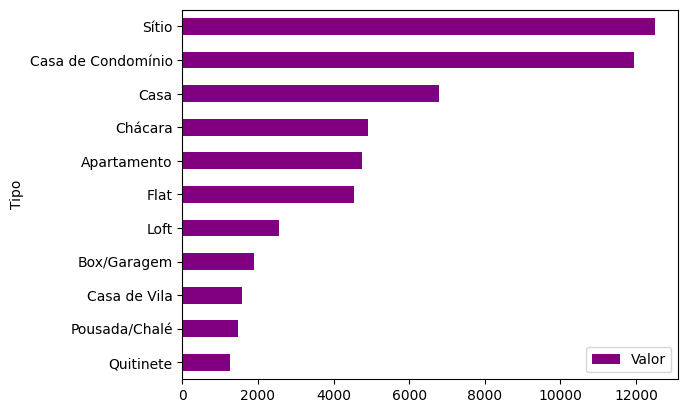

In [ ]:
# Ploting a new graph based on residential only for having consistency on data

residential_TipoValor = dfResidential.groupby('Tipo')[['Valor']].mean().sort_values('Valor', ascending=True)

print(f'{residential_TipoValor}\n')

residential_TipoValor.plot(kind='barh',
                           color='purple')

                                     Valor
Tipo                                      
Studio                         2400.000000
Loja Shopping/ Ct Comercial    8126.178862
Loja/Salão                    13769.646770
Casa Comercial                14478.264151
Conjunto Comercial/Sala       14715.045521
Loteamento/Condomínio         22000.000000
Hotel                         25000.000000
Terreno Padrão                32567.714286
Galpão/Depósito/Armazém       53407.062600
Indústria                    120000.000000
Prédio Inteiro               498637.239203



<Axes: ylabel='Tipo'>

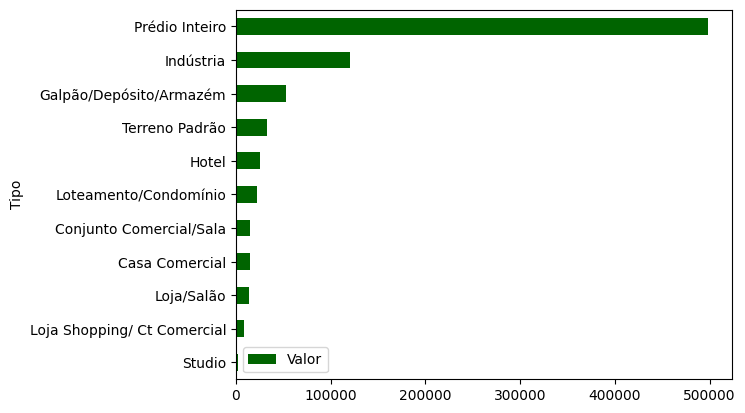

In [ ]:
# Ploting a new graph based on commercial only for having consistency on data

commercial_TipoValor = dfCommercial.groupby('Tipo')[['Valor']].mean().sort_values('Valor',ascending=True)

print(f'{commercial_TipoValor}\n')

commercial_TipoValor.plot(kind='barh',
                          color='darkgreen')

In [ ]:
# Selecionando imóveis comerciais com pelo menos uma suite para visualização
df.query('(Suites > 0) & (@commercial_properties in Tipo)')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
725,Casa Comercial,Copacabana,12,0,12,360,17000.0,NaN,1150.0
4723,Conjunto Comercial/Sala,Recreio dos Bandeirantes,0,0,1,30,1300.0,600.0,NaN
4740,Casa Comercial,Botafogo,11,4,3,400,8000.0,NaN,2190.0
7228,Casa Comercial,Campo Grande,2,0,1,50,25000.0,NaN,NaN
7480,Casa Comercial,Flamengo,8,8,2,1000,28000.0,NaN,300.0
8081,Conjunto Comercial/Sala,Recreio dos Bandeirantes,1,1,1,30,1200.0,300.0,112.0
8147,Conjunto Comercial/Sala,Campo Grande,0,0,70,54,1200.0,400.0,NaN
9687,Hotel,Copacabana,24,0,24,1100,38000.0,NaN,7504.0
10600,Casa Comercial,Botafogo,12,2,1,380,15000.0,NaN,1640.0
12823,Casa Comercial,Laranjeiras,27,0,10,1000,13000.0,NaN,900.0


## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [ ]:
# Visualizando os tipos de imóveis da nossa base de dados (a partir de agora estamos trabalhando apenas com os residenciais)

dfResidential.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Box/Garagem', 'Loft', 'Chácara', 'Sítio',
       'Pousada/Chalé'], dtype=object)

In [ ]:
# Entendendo a quantidade de cada tipo de imóvel

print(dfResidential.Tipo.value_counts()) # Assim obtemos apenas as quantidades
print()
print(dfResidential.Tipo.value_counts(normalize=True)) # Normalizando essa quantidade em porcentagem, mas ainda sem passar para um frame
print()
dfResidential.Tipo.value_counts(normalize=True).to_frame().sort_values('proportion', ascending= True) # Passando isso para um frame, ordenando de forma crescente e armazenando isso em uma variável para plotar um gráfico

Tipo
Apartamento           19532
Casa de Condomínio      996
Casa                    967
Quitinete               836
Flat                    476
Casa de Vila            249
Box/Garagem              82
Loft                     51
Sítio                    10
Chácara                   1
Pousada/Chalé             1
Name: count, dtype: int64

Tipo
Apartamento           0.841860
Casa de Condomínio    0.042929
Casa                  0.041679
Quitinete             0.036033
Flat                  0.020516
Casa de Vila          0.010732
Box/Garagem           0.003534
Loft                  0.002198
Sítio                 0.000431
Chácara               0.000043
Pousada/Chalé         0.000043
Name: proportion, dtype: float64



,proportion
Tipo,
Pousada/Chalé,0.000043
Chácara,0.000043
Sítio,0.000431
Loft,0.002198
Box/Garagem,0.003534
Casa de Vila,0.010732
Flat,0.020516
Quitinete,0.036033
Casa,0.041679


,Porcentagem
Tipo,
Pousada/Chalé,0.000043
Chácara,0.000043
Sítio,0.000431
Loft,0.002198
Box/Garagem,0.003534
Casa de Vila,0.010732
Flat,0.020516
Quitinete,0.036033
Casa,0.041679


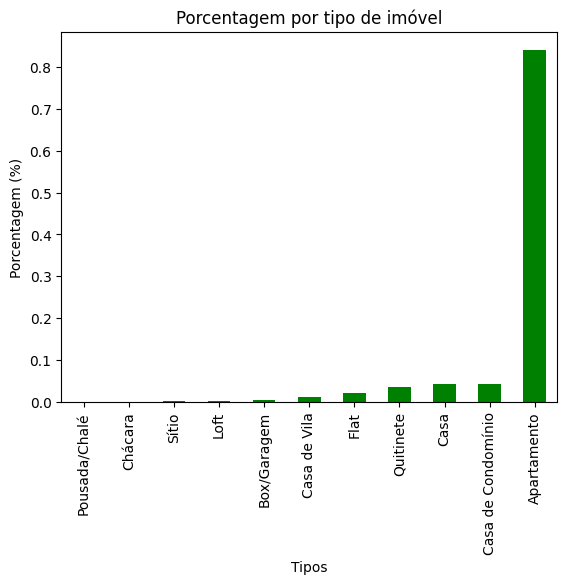

In [ ]:
dfResPerc = dfResidential.Tipo.value_counts(normalize=True).to_frame().sort_values('proportion', ascending= True)

dfResPerc.rename(columns={'proportion':'Porcentagem'}, inplace=True) # Aqui, estamos trocando o título "proportion" que foi definido automaticamente ao criarmos a nova coluna
# columns especifica a troca que estamos fazendo <|> inplace como True garante que essa troca está sendo definitiva

dfResPerc.plot(kind='bar',
               color='green',
               xlabel='Tipos',
               ylabel='Porcentagem (%)',
               title='Porcentagem por tipo de imóvel',
               legend=False)

dfResPerc

### **Selecionando apenas os imóveis do tipo apartamento**

In [ ]:
# Percebendo que os apartamentos são a maioria da base de dados e que as características de cada imóvel são diferentes e, por isso, cada um tem sua precificação, iremos trabalhar apenas com apartamentos

dfApts = dfResidential.query('Tipo == "Apartamento"') # Or we could use ".query('"Apartamento" in Tipo')" that is the same
dfApts

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Tratando e filtrando os dados

## Lidando com dados nulos

In [ ]:
# Verificando a existência de valores nulos

dfApts.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
32951,False,False,False,False,False,False,False,False,True
32953,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False


In [ ]:
# Verificando a existência de valores nulos(missing values) de maneira mais dinâmica

dfApts.isnull().sum()

,0
Tipo,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,7
Condominio,745
IPTU,5472


In [ ]:
# Preenchendo os valores nulos "NA/NaN"

dfApts.fillna(0, inplace=True)

/tmp/ipython-input-28-2383940350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfApts.fillna(0, inplace=True)


In [ ]:
# Conferindo se o tratamento deu certo

dfApts.isnull().sum()

,0
Tipo,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,0
Condominio,0
IPTU,0


## Removendo registros

In [ ]:
# Verificando a existência desses dados

dfApts.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [ ]:
# Armazenando os index desses dados para removê-los

linesToRemove = dfApts.query('Valor == 0 | Condominio == 0').index

In [ ]:
dfApts.drop(linesToRemove, axis=0, inplace=True)

/tmp/ipython-input-32-3944796829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfApts.drop(linesToRemove, axis=0, inplace=True)


In [ ]:
dfApts.shape

(18780, 9)

In [ ]:
dfApts.drop('Tipo', axis=1, inplace=True)

/tmp/ipython-input-34-4237730428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfApts.drop('Tipo', axis=1, inplace=True)


In [ ]:
dfApts.shape

(18780, 8)

## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [ ]:
df_filtro1 = dfApts.query('(Quartos == 1) & (Valor < 1200)')
df_filtro1

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [ ]:
df_filtro2 = dfApts.query('(Quartos > 1) & (Valor < 3000) & (Area > 70)')

In [ ]:
df_filtro2

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


## Salvando os dados

In [ ]:
dfApts.to_csv('Dados_Apartamentos.csv', sep=';')

In [ ]:
pd.read_csv('Dados_Apartamentos.csv', sep=';')

,Unnamed: 0,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,3,Centro,1,0,0,15,800.0,390.0,20.0
1,4,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,6,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,11,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
18775,32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,32953,Méier,2,0,0,70,900.0,490.0,48.0
18777,32956,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,32957,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
# Salvando com os índixes nativos do dataframe primário para guardar

new_df = pd.read_csv('Dados_Apartamentos.csv', sep=';')
new_df.rename(columns={'Unnamed: 0':'Native_Index'}, inplace=True)
new_df
new_df.to_csv('Dados_Apartamentos_NI.csv', sep=';', index=False)

In [ ]:
# Conferindo se foi salvo corretamente
pd.read_csv('Dados_Apartamentos_NI.csv', sep=';')

,Native_Index,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,3,Centro,1,0,0,15,800.0,390.0,20.0
1,4,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,6,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,11,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
18775,32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,32953,Méier,2,0,0,70,900.0,490.0,48.0
18777,32956,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,32957,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
dfApts.to_csv('Dados_Apartamentos.csv', sep=';', index=False)
pd.read_csv('Dados_Apartamentos.csv', sep=';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
# Salvando os dataframes de filtro que o time de ML pediu
df_filtro1.to_csv('Dados_Filtro_1.csv', sep=';', index=False)
df_filtro2.to_csv('Dados_Filtro_2.csv', sep=';', index=False)

# Manipulando os dados

## Criando colunas numéricas

In [ ]:
# Adicionando o custo mensal no df original

# Antes disso, tratando os dados nulos

df.isnull().sum()
df.fillna(0, inplace=True)
linhas_a_retirar = df.query('(Valor == 0) | (Condominio == 0) | (IPTU == 0)').index
df.drop(linhas_a_retirar, axis=0, inplace=True)
df

df.rename(columns={'Valor':'Aluguel'}, inplace=True)
df['Valor_mensal'] = df['Aluguel'] + df['Condominio']
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Aluguel,Condominio,IPTU,Valor_mensal
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,54193.0
...,...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1390.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0


In [ ]:
df['Valor_anual'] = df['Valor_mensal'] * 12 + df['IPTU']
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Aluguel,Condominio,IPTU,Valor_mensal,Valor_anual
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,54193.0,653346.0
...,...,...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1390.0,16728.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0,13825.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,31240.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,22945.0


## Criando colunas categóricas

In [ ]:
df['Descrição'] = df['Tipo'] + ' em ' + df['Bairro'] + ' com ' + df['Quartos'].astype(str) + ' quarto(s)' + ' e ' + df['Vagas'].astype(str) + ' vaga(s)'
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Aluguel,Condominio,IPTU,Valor_mensal,Valor_anual,Descrição,Possui_Suítes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...,não
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vaga(s),não


In [ ]:
df['Possui_Suítes'] = df['Suites'].apply(lambda qnt: 'sim' if qnt > 0 else 'não')
df.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Aluguel,Condominio,IPTU,Valor_mensal,Valor_anual,Descrição,Possui_Suítes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...,não
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vaga(s),não


# Criando um novo arquivo com as novas colunas para o time de DEV

In [ ]:
df.to_csv('Dados_Time_DEV.csv', sep=';', index=True)

df_dev = pd.read_csv('Dados_Time_DEV.csv', sep=';')
df_dev.rename(columns={'Unnamed: 0': 'Native_Index'}, inplace=True)

df_dev.to_csv('Dados_Time_DEV.csv', sep=';', index=False)
pd.read_csv('Dados_Time_DEV.csv', sep=';')

,Native_Index,Tipo,Bairro,Quartos,Vagas,Suites,Area,Aluguel,Condominio,IPTU,Valor_mensal,Valor_anual,Descrição,Possui_Suítes
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...,não
1,2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,não
2,3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vaga(s),não
3,6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0,Apartamento em Cachambi com 2 quarto(s) e 0 va...,não
4,9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,54193.0,653346.0,Conjunto Comercial/Sala em Centro com 0 quarto...,não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21147,32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1390.0,16728.0,Apartamento em Méier com 2 quarto(s) e 0 vaga(s),não
21148,32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0,13825.0,Quitinete em Centro com 0 quarto(s) e 0 vaga(s),não
21149,32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,31240.0,Apartamento em Jacarepaguá com 3 quarto(s) e 1...,sim
21150,32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,22945.0,Apartamento em São Francisco Xavier com 2 quar...,não
